<a href="https://colab.research.google.com/github/kecosz/rELA/blob/main/%20rELA0_80_2_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial for rELA 0.80.2
### Notes:

### 0.80.2

#### **Fix the error in *SSentropy*, *Stability*, and *gStability* function.**

The new ***SSentropy***, ***Stability***, ***gStability*** functions can show whether all stable state searches successfully converged and display whether the configuration used is sufficient for the target dataset.

#### **Disconnectivity Graph with interquartile range**

The SGD method usually produces deviations in the parameter estimation process.

The new function, ***bootstrap_ELA***, performs bootstrap sampling on a series of estimated parameter sets and computes the variability of the estimated energies among the predicted stable states and tipping points.

The new ***showDG*** function considers variabilities in energies and displays a range as an IQR box plot for each stable state or tipping point.


## Setup

In [ ]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

## rpy2 version specification
### Required to successfully execute "%load_ext rpy2.ipython" as of 2023/1
!pip install rpy2==3.5.1
#!pip install --upgrade ipykernel
%load_ext rpy2.ipython

###The following codes is just for not showing rpy2 messages related to R package installation on google colab
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)   # will display errors, but not warnings

## Doanload rELA package
!rm -r rELA
!git clone https://github.com/kecosz/rELA.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Cloning into 'rELA'...
remote: Enumerating objects: 1033, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 1033 (delta 199), reused 115 (delta 115), pack-reused 764 (from 2)
Receiving objects: 100% (1033/1033), 11.24 MiB | 18.18 MiB/s, done.
Resolving deltas: 100% (504/504), done.


In [ ]:
%%R
# [for Google Colab]
# from v0.50, Due to errors in installing igraph and tidygraph
#system("add-apt-repository -y ppa:marutter/rrutter4.0")
#system("add-apt-repository -y ppa:c2d4u.team/c2d4u4.0+")
#system("add-apt-repository ppa:cran/v8")
#system("apt-get update")
#system("apt-get install libnode-dev")
#system("apt-get install r-cran-igraph r-cran-tidygraph")

NULL


In [ ]:
%%R
## package instllation
install.packages("Rcpp")
install.packages("RcppArmadillo")
install.packages("doParallel")
install.packages('tidyverse')
install.packages('gsubfn')
install.packages('zoo')
install.packages('dplyr')
install.packages('tidyr')
install.packages('ggplot2')
install.packages('gtools')
install.packages('ggsci')
install.packages('igraph')
install.packages('tidygraph')
install.packages('RColorBrewer')
install.packages("stringdist")
install.packages("purrr")
install.packages("plot3D")
install.packages("devtools")
library("Rcpp")
library("RcppArmadillo")
library("doParallel")
library('tidyverse')
library('gsubfn')
library('zoo')
library('dplyr')
library('tidyr')
library('ggplot2')
library('gtools')
library('ggsci')
library('igraph')
library('tidygraph')
library('RColorBrewer')
library("stringdist")
library("purrr")
library("plot3D")
library("devtools")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::accumulate() masks foreach::accumulate()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::when()       masks foreach::when()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
%%R
# If already installed
detach("package:rELA",unload=TRUE)
remove.packages("rELA")

In [ ]:
%%R
install.packages("rELA/rELA.v0.80.2.tar.gz")
library("rELA")

### Using randomly generated parameter sets

In [ ]:
%%R
# ocmatrix and enmatrix can be generated from the heatbath sampling
# based on the randomly generated parameter sets, h, g, and J.
# Here, j_connectivity is set to 0.5, meaning that species-species interactions exist (> 0)
# in 50 % of all possible pairs, and otherwise the rest 50 % is set to 0 in J matrix.

hb_params <- hb.paramgen(32, ne = 0, j_connectivity=0.5)
h.act <- hb_params[[1]]
j.act <- hb_params[[2]]
list[rand_mat,rand_enmat] <- HeatBath(500, 512, h.act, j.act)
list[rand_mat, abmat, rand_enmat, samplelabel, specieslabel, factorlabel] <-
  Formatting(rand_mat, basemetadata=rand_enmat, normalize=1, parameters=c(0.01, 0.01, 0.99), grouping=1, grouping_th=0.)

Processed 512 samples.
Relative abundance threshold = 0.01 
Occurrence threshold (lower) = 0.01 
Occurrence threshold (upper) = 0.99 
0  groups were found.
Selected  24  out of  32 species.


In [ ]:
%%R
head(rand_mat)

           species.18 species.6 species.25 species.19 species.4 species.15
sample.1            0         0          0          0         0          0
sample.10           0         0          0          0         1          1
sample.100          0         0          0          0         1          1
sample.101          0         0          0          0         1          1
sample.102          0         0          0          0         0          0
sample.103          0         0          0          0         0          0
           species.28 species.17 species.1 species.3 species.11 species.27
sample.1            0          1         1         1          1          1
sample.10           1          0         0         0          1          1
sample.100          1          0         0         1          0          0
sample.101          1          0         0         0          0          0
sample.102          0          0         1         1          0          1
sample.103          1    

### Parameter fitting

In [ ]:
%%R
# Here, a randomly generated matrix is used in this tutorial for validation.
list[bp,allresults] <- Findbp2(rand_mat,rep=32,threads=2,lmd=c(0.005),
                              fastfitting = TRUE,intv=100,totalit=5000)

Try: l=0.005000, maxlr=0.002000, runadamW=TRUE, Sparse=TRUE

Try: l=0.005000, maxlr=0.005000, runadamW=TRUE, Sparse=TRUE

Try: l=0.005000, maxlr=0.007500, runadamW=TRUE, Sparse=TRUE

Try: l=0.005000, maxlr=0.010000, runadamW=TRUE, Sparse=TRUE



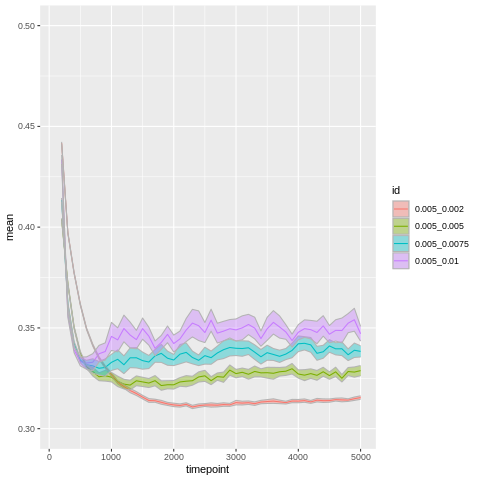

In [ ]:
%%R
plotSAtest(allresults,ylim=c(0.3,0.5))

Here, "id" corresponds to the tested parameter sets (lambda, maxlearningrate), which are key hyper parameters for SGD.

In [ ]:
%%R
# Then use the parameter set giving the best fitted result
list[lmd,we,totalit] <- as.numeric(unlist(strsplit(names(bp)[1], split = "_")))
#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)
sa <- runSA(rand_mat, rep = 32,threads=2,getall=FALSE,totalit=totalit,
            lambda = lmd, we = we)


Start parameter fitting:
SA: elapsed time 200.91 sec



In [ ]:
%%R
list[he,je,ge,hge] <- sa2params(sa)

### Running Stability analysis. The convTime is set to 100.

In [ ]:
%%R
stab <- Stability(sa,rand_mat,seitr=100,seconvTime=100,threads=2)

Start Stability:
Convergence rate: 0.46 
more than 10% searches were not converged. convTime may be too small, try larger convTime.
Stability: elapsed time 14.68 sec



### Then, change convTime is set to 1000.

In [ ]:
%%R

stab <- Stability(sa,rand_mat,seitr=100,seconvTime=1000,threads=2)

Start Stability:
Convergence rate: 0.99 
Stability: elapsed time 21.03 sec



In [ ]:
%%R
head(stab,5)

           energy.gap ss.entropy e.realize  e.stable state.id stable.state.id
sample.1    0.3927809   1.657823 -24.36559 -24.75837     0V//            0Vt/
sample.10   1.1228188   1.660515 -23.63167 -24.75449     3Z//            3X//
sample.100  2.6537945   1.833807 -21.72835 -24.38214     3aV/            3WV/
sample.101  1.7583313   1.722261 -22.99616 -24.75449     3Wl/            3X//
sample.102  3.3771989   1.842492 -21.38118 -24.75837     0Dt/            0Vt/


### Draw disconnectivity graph with IQR

In [ ]:
%%R
# Using the test datasets, running bootstrap sampling in ELA.
# Here, runSA function with "getall = TRUE" to get the results from all series.
fittingMat <- runSA(rand_mat, rep = 32, threads=2, getall=TRUE,totalit=totalit,lambda = lmd, we = we)

bootstrap <- bootstrap_ELA(fittingMat,rand_mat,iterations=64,resamplesize=16)

Start parameter fitting:
SA: elapsed time 206.10 sec

Run bootstrap sampling of sa params.
calculate Energy.


In [ ]:
%%R
ela_rep <- bootstrap[[1]]
bootstrap_ene <- bootstrap[[2]]
ela_rep

[[1]]
[1] "3X//" "0Vt/" "3WV/" "2l//"

[[2]]
[1] -24.75422 -24.42004 -24.28158 -23.79393

[[3]]
[[3]]$`1`
[1] "Inf" "Inf" "Inf" "Inf"

[[3]]$`2`
[1] "2V//" "Inf"  "Inf"  "Inf" 

[[3]]$`3`
[1] "3XV/" "3Y//" "Inf"  "Inf" 

[[3]]$`4`
[1] "3l//" "2V//" "3l//" "Inf" 


[[4]]
[[4]]$`1`
[1] Inf Inf Inf Inf

[[4]]$`2`
[1] -22.62387       Inf       Inf       Inf

[[4]]$`3`
[1] -23.74503 -22.37974       Inf       Inf

[[4]]$`4`
[1] -23.49230 -22.62387 -23.49230       Inf




In [ ]:
%%R
head(bootstrap_ene,3)

        trial1    trial2    trial3    trial4    trial5    trial6    trial7
3X// -24.11766 -25.37618 -24.16406 -25.11914 -24.61815 -24.55005 -24.88611
0Vt/ -24.41154 -25.47760 -24.19867 -25.23427 -24.49169 -25.31062 -25.17884
3WV/ -23.64777 -24.56104 -23.87329 -24.48279 -23.83455 -23.78481 -24.02858
        trial8    trial9   trial10   trial11   trial12   trial13   trial14
3X// -24.82286 -24.92025 -23.51294 -23.72925 -24.85163 -24.42289 -24.63643
0Vt/ -24.04731 -24.73185 -24.26924 -24.91719 -25.21555 -24.86907 -24.11645
3WV/ -24.39704 -24.04607 -23.26617 -23.32110 -23.91143 -23.64583 -24.05144
       trial15   trial16   trial17   trial18   trial19   trial20   trial21
3X// -24.70063 -24.95609 -24.42245 -24.92748 -24.84583 -24.56701 -24.12177
0Vt/ -24.60921 -24.15434 -24.73542 -25.26589 -25.63493 -24.34913 -23.80716
3WV/ -24.23929 -24.51968 -24.04988 -23.88077 -23.96679 -24.08478 -23.75173
       trial22   trial23   trial24   trial25   trial26   trial27   trial28
3X// -24.15379 -24.71702 

NULL


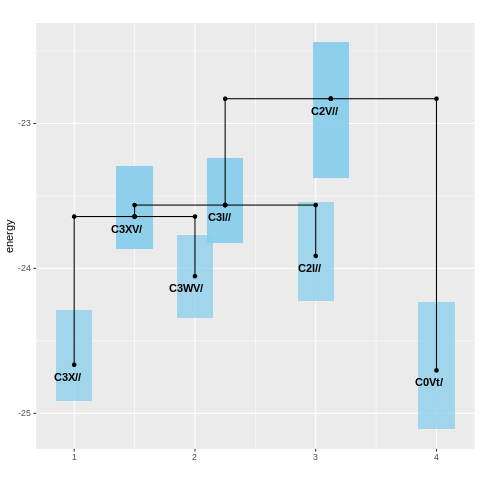

In [ ]:
%%R
showDG(ela_rep,rand_mat,bootstrap_ene=bootstrap_ene)